## Phase-End Project: Marketing Campaigns

In [1]:
import csv
import numpy as np
import pandas as pd
df = pd.read_csv('marketing_data.csv')

In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Data cleanup, remove blank spaces
### Clean up income column, replace '$',',' and convert to float

In [4]:
df.columns = df.columns.str.replace(' ','')

In [5]:
df['Income'] = df['Income'].str.replace('[$,,]','').astype(float)

C:\Users\winph\AppData\Local\Temp\ipykernel_9132\1119766985.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Income'] = df['Income'].str.replace('[$,,]','').astype(float)


In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
df['Income'].dtypes

dtype('float64')

### Clean up Dt_Customer column, convert to datetime

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
df['Dt_Customer'].dtypes

dtype('<M8[ns]')

### Cleanup Marital_Status column, function to change marital status to 2 categories: couple and alone

In [10]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [11]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [12]:
def marriage_cat(x):
    if x in ['Married', 'Together']:
             return 'couple'
    else:
        return 'alone'

In [13]:
df['Marital_Status'] = df['Marital_Status'].apply(marriage_cat)

In [14]:
df['Marital_Status'].value_counts()

couple    1444
alone      796
Name: Marital_Status, dtype: int64

### average income calculated for similar education and marital status using groupby
### apply for loop to replace missing values in income column with average income calculated

In [15]:
avg_inc = df.groupby(['Education','Marital_Status'])['Income'].mean().unstack()
avg_inc

Marital_Status,alone,couple
Education,,
2n Cycle,51957.984375,45597.992647
Basic,17998.350000,21663.852941
Graduation,52615.569652,52779.380952
Master,53170.472000,52785.795833
PhD,54050.657143,57343.238562


In [16]:
for education in df['Education'].unique():
    for status in df['Marital_Status'].unique():
        value=avg_inc.loc[education,status]
        df.loc[(df['Education']==education) & (df['Marital_Status']==status) & (df['Income'].isnull()),'Income']=value  

In [17]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

#### •	Create variables to populate the total number of children, age, and total spending. 

In [18]:
# total children is calculated from sum of kids and teens
# age is claculated from year of birth
# total spends is calculated from sum of all amount columns
# total purchases is calculated from sum of all purchase columns

In [19]:
df['total_children'] = df['Kidhome']+df['Teenhome']

In [20]:
import datetime
now_year = datetime.datetime.now().year

In [21]:
df['Age'] = now_year - df['Year_Birth']

In [22]:
df.columns.str.startswith('Mnt')

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
df.loc[:,df.columns.str.startswith('Mnt')]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


In [24]:
df['total_spent'] = df.loc[:,df.columns.str.startswith('Mnt')].sum(axis=1)

In [25]:
df['total_purchase'] = df.loc[:,df.columns.str.endswith('Purchases')].sum(axis=1)

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_children,Age,total_spent,total_purchase
0,1826,1970,Graduation,alone,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,54,1190,15
1,1,1961,Graduation,alone,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,63,577,18
2,10476,1958,Graduation,couple,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,66,251,11
3,1386,1967,Graduation,couple,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,57,11,4
4,5371,1989,Graduation,alone,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,35,91,8


#### •	Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

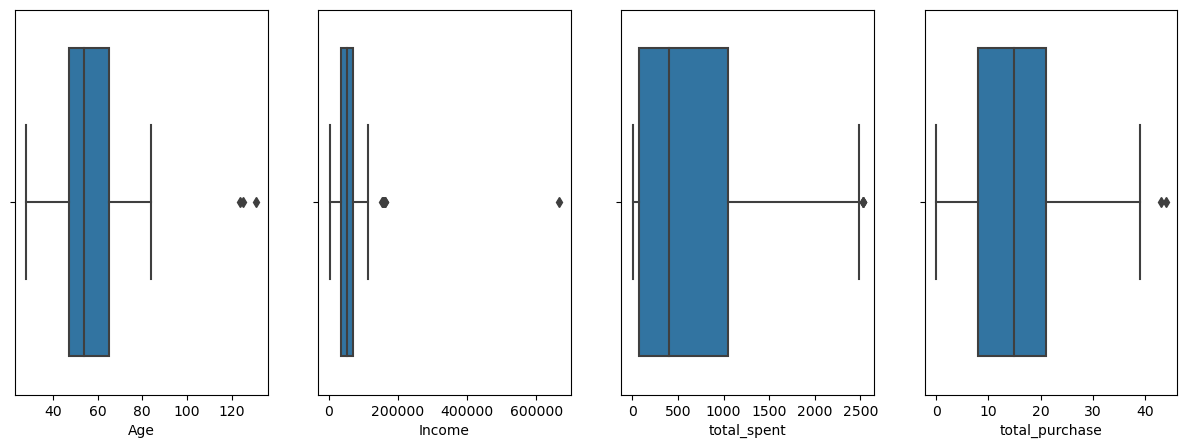

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_vars = ['Age','Income','total_spent','total_purchase']

figure,ax = plt.subplots(1,len(numerical_vars),figsize = (15,5))
i=0
for x in numerical_vars:
    sns.boxplot(x=df[x],ax=ax[i])
    i+=1
    

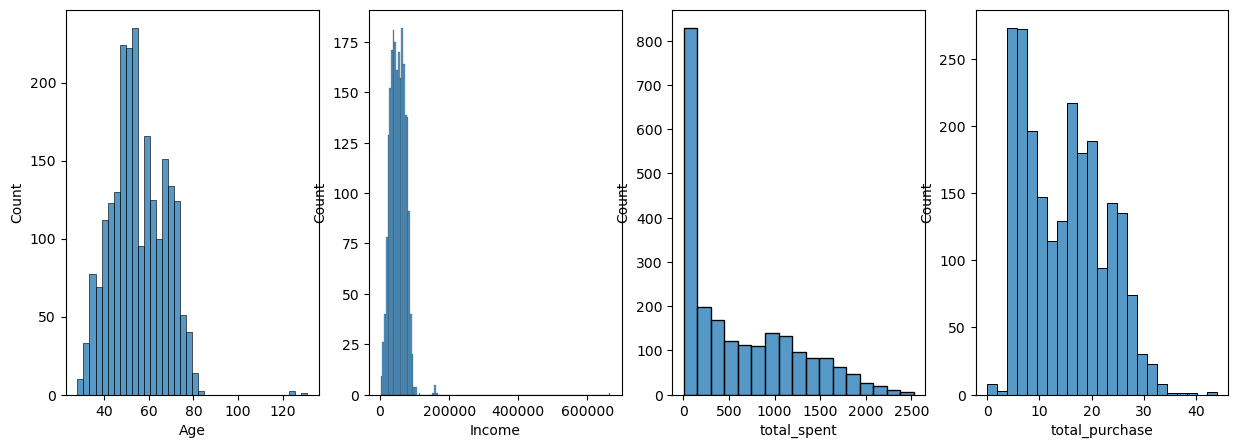

In [28]:
figure,ax = plt.subplots(1,len(numerical_vars),figsize = (15,5))
i=0
for x in numerical_vars:
    sns.histplot(x=df[x],ax=ax[i])
    i+=1
    

In [29]:
## interquartile range calculated and upper and lower limits calculated
## Outlier treatment, replace the outlier values with upper and lower limits

In [30]:
def outliers_det(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    low = q1-(1.5*iqr)
    up = q3+(1.5*iqr)
    return low,up

In [31]:
for var in numerical_vars:
    low,up = outliers_det(df[var])
    df.loc[df[var]<low,var] = low
    df.loc[df[var]>up,var] = up

#### •	Use ordinal encoding and one hot encoding according to different types of categorical variables

In [32]:
## from scikit learn library, set ordinal and one hot encoding to categorical columns Education, Marital_Status and Country

In [33]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [34]:
df.select_dtypes('object')

,Education,Marital_Status,Country
0,Graduation,alone,SP
1,Graduation,alone,CA
2,Graduation,couple,US
3,Graduation,couple,AUS
4,Graduation,alone,SP
...,...,...,...
2235,PhD,alone,US
2236,2n Cycle,couple,SP
2237,Graduation,alone,SP
2238,Graduation,couple,IND


In [35]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [36]:
ord = OrdinalEncoder(categories = [['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']])
ord.fit(df[['Education']])
df['Edu_encode'] = ord.transform(df[['Education']]).flatten()

In [37]:
df['Edu_encode'].unique()

array([0., 1., 2., 3., 4.])

In [38]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['Country']]).toarray().astype('int')

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [39]:
country_encode = pd.DataFrame(ohe.fit_transform(df[['Country']]).toarray().astype('int'), columns = ohe.categories_[0]) 

In [40]:
marital_encode = pd.DataFrame(ohe.fit_transform(df[['Marital_Status']]).toarray().astype('int'), columns = ohe.categories_[0]) 

In [41]:
country_encode

,AUS,CA,GER,IND,ME,SA,SP,US
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,1
2236,0,0,0,0,0,0,1,0
2237,0,0,0,0,0,0,1,0
2238,0,0,0,1,0,0,0,0


In [42]:
marital_encode

,alone,couple
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
2235,1,0
2236,0,1
2237,1,0
2238,0,1


In [43]:
new_df = pd.concat([df,country_encode,marital_encode],axis=1)

In [44]:
new_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AUS,CA,GER,IND,ME,SA,SP,US,alone,couple
0,1826,1970,Graduation,alone,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,0,1,0,1,0
1,1,1961,Graduation,alone,57091.0,0,0,2014-06-15,0,464,...,0,1,0,0,0,0,0,0,1,0
2,10476,1958,Graduation,couple,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,1,0,1
3,1386,1967,Graduation,couple,32474.0,1,1,2014-05-11,0,10,...,1,0,0,0,0,0,0,0,0,1
4,5371,1989,Graduation,alone,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,0,0,1,0,1,0


#### •	Create a heatmap to showcase the correlation between different pairs of variables

In [45]:
new_df.corr()

C:\Users\winph\AppData\Local\Temp\ipykernel_9132\4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AUS,CA,GER,IND,ME,SA,SP,US,alone,couple
ID,1.000000,0.000028,0.001907,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,0.004263,0.017914,-0.038586,-0.000556,0.002055,0.014006,-0.010165,0.008893,-0.018930,0.018930
Year_Birth,0.000028,1.000000,-0.202442,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.029649,-0.022268,-0.001605,0.047960,0.010782,0.013178,-0.000026,-0.008283,-0.004237,0.004237
Income,0.001907,-0.202442,1.000000,-0.518557,0.036272,0.005322,0.704978,0.519905,0.682947,0.533212,...,0.000532,0.018265,0.011833,-0.040111,0.010145,0.024164,-0.019885,0.010061,0.006104,-0.006104
Kidhome,0.002406,0.230176,-0.518557,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.038414,-0.018002,-0.019535,0.037591,-0.030220,0.033187,-0.032179,-0.017028,-0.023532,0.023532
Teenhome,-0.002580,-0.352111,0.036272,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.006368,0.033668,-0.024582,-0.006355,0.010791,-0.022034,0.002717,0.003120,-0.030796,0.030796
Recency,-0.046524,-0.019871,0.005322,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.023497,-0.029088,0.002388,0.010788,-0.028383,0.004664,0.020209,0.007171,0.004508,-0.004508
MntWines,-0.022878,-0.157773,0.704978,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.021932,0.013057,0.005955,-0.046539,0.029643,0.012956,0.013751,-0.004458,0.006023,-0.006023
MntFruits,0.004600,-0.017917,0.519905,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.014140,0.024111,-0.004700,-0.004643,-0.021767,0.002297,-0.007972,0.009239,0.024452,-0.024452
MntMeatProducts,-0.004437,-0.030872,0.682947,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.027769,0.008567,0.007380,0.004997,0.017102,0.011819,-0.014913,0.018927,0.019620,-0.019620
MntFishProducts,-0.024475,-0.041625,0.533212,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.005398,-0.000726,0.009581,-0.023816,0.025350,0.023410,-0.013496,0.013172,0.017125,-0.017125


In [46]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'total_children',
       'Age', 'total_spent', 'total_purchase', 'Edu_encode', 'AUS', 'CA',
       'GER', 'IND', 'ME', 'SA', 'SP', 'US', 'alone', 'couple'],
      dtype='object')

In [47]:
reqd_vars = ['Income', 'Recency', 'total_children',
       'Age', 'total_spent', 'total_purchase']

<Axes: >

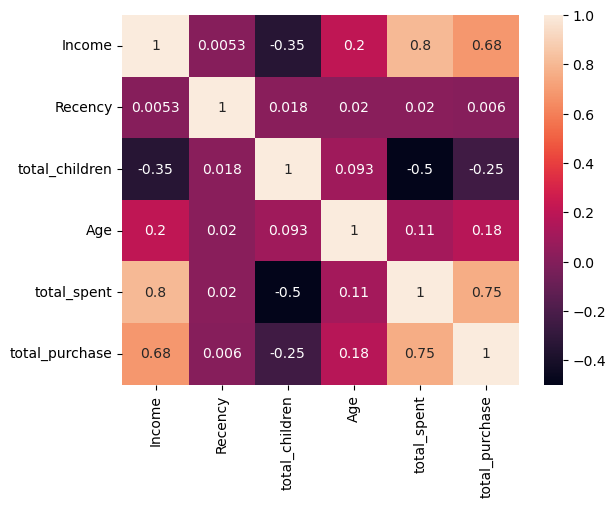

In [48]:
sns.heatmap(new_df[reqd_vars].corr(),annot=True)

## Hypothesis testing 

#### Older people are not as tech-savvy and probably prefer shopping in-store

In [49]:
store = new_df.loc[new_df.Age>60, 'NumStorePurchases']
web = new_df.loc[new_df.Age>60, 'NumWebPurchases']

In [50]:
store

1       7
2       5
5       5
6       7
8       9
       ..
2202    3
2216    7
2217    7
2227    5
2233    2
Name: NumStorePurchases, Length: 744, dtype: int64

In [51]:
web

1        7
2        3
5        4
6       10
8        6
        ..
2202     2
2216     4
2217     4
2227     5
2233     2
Name: NumWebPurchases, Length: 744, dtype: int64

In [52]:
# since population std_dev not known, we perform t-test
# null hypothesis H0: older people, no preference, num of store purchases <= web purchases
# alternate hypothesis Ha: older people, prefer store shopping, num of store purchases > web purchases
# alternative > greater, right tail 1-tail t-test

In [53]:
import scipy.stats as stats
stats.ttest_ind(store,web,alternative='greater')

Ttest_indResult(statistic=12.160587900236624, pvalue=8.337142175273913e-33)

In [54]:
# p-value < 0.05, hence reject null, so older people prefer store shopping over online shopping

In [55]:
store_2 = new_df.loc[new_df.total_children>0, 'NumStorePurchases']
web_2 = new_df.loc[new_df.total_children>0, 'NumWebPurchases']

#### Customers with kids probably have less time to visit a store and would prefer to shop online

In [56]:
# null hypothesis H0: customers with children, num of online purchases <= store purchases
# alternate hypothesis Ha: customers with children, prefer online shopping, num of web purchases > store purchases

In [57]:
stats.ttest_ind(web_2,store_2,alternative='greater')

Ttest_indResult(statistic=-11.85534380488127, pvalue=1.0)

In [58]:
# p-value > 0.05, hence fail to reject null, so customers with children store shopping is more than online shopping

#### Other distribution channels may cannibalize sales at the store

In [59]:
# null H0: (NumWebPurchases + NumCatalogPurchases) <= NumStorePurchases
# alternate Ha: (NumWebPurchases + NumCatalogPurchases) > NumStorePurchases

In [60]:
web_and_catalog = new_df['NumWebPurchases'] + new_df['NumCatalogPurchases']
store = new_df['NumStorePurchases']

In [61]:
stats.ttest_ind(web_and_catalog,store,alternative='greater')

Ttest_indResult(statistic=7.884334964023309, pvalue=1.971324447658957e-15)

In [62]:
# p-value < 0.05, hence reject null, so store purchases are more than other purchases

#### Does the US fare significantly better than the rest of the world in terms of total purchases?

In [63]:
# Null H0: Purchases from US <= purchases from the rest of the countries
# Alternate H1: purchases from US > purchases from rest of the countries

In [64]:
new_df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [65]:
us_purchase = new_df.loc[new_df.Country == 'US', 'total_purchase']
other_countries = new_df.loc[new_df.Country != 'US', 'total_purchase']

In [66]:
stats.ttest_ind(us_purchase,other_countries,alternative='greater')

Ttest_indResult(statistic=1.7339544907234352, pvalue=0.04153193317039351)

In [67]:
# p-value < 0.05, hence reject null, so purchases from US is greater than the purchases from rest of the countries

In [68]:
new_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AUS,CA,GER,IND,ME,SA,SP,US,alone,couple
0,1826,1970,Graduation,alone,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,0,1,0,1,0
1,1,1961,Graduation,alone,57091.0,0,0,2014-06-15,0,464,...,0,1,0,0,0,0,0,0,1,0
2,10476,1958,Graduation,couple,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,1,0,1
3,1386,1967,Graduation,couple,32474.0,1,1,2014-05-11,0,10,...,1,0,0,0,0,0,0,0,0,1
4,5371,1989,Graduation,alone,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,0,0,1,0,1,0


####  Which products are performing the best, and which are performing the least in terms of revenue?

In [69]:
prod_vars = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds']

[Text(0, 0, 'MntWines'),
 Text(1, 0, 'MntFruits'),
 Text(2, 0, 'MntMeatProducts'),
 Text(3, 0, 'MntFishProducts'),
 Text(4, 0, 'MntSweetProducts'),
 Text(5, 0, 'MntGoldProds')]

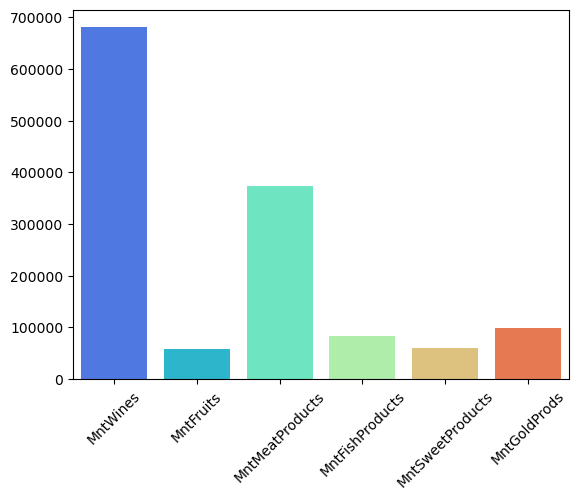

In [70]:
prod_sums = new_df[prod_vars].sum()
ax = sns.barplot(x=prod_sums.index, y=prod_sums.values, palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

#### o	Is there any pattern between the age of customers and the last campaign acceptance rate?

In [71]:
new_df['camp_count'] = new_df.groupby(['Age'])['Response'].sum() 
# group by age and gives total response to last campaign

,Age,camp_count
Age,1.000000,0.123471
camp_count,0.123471,1.000000


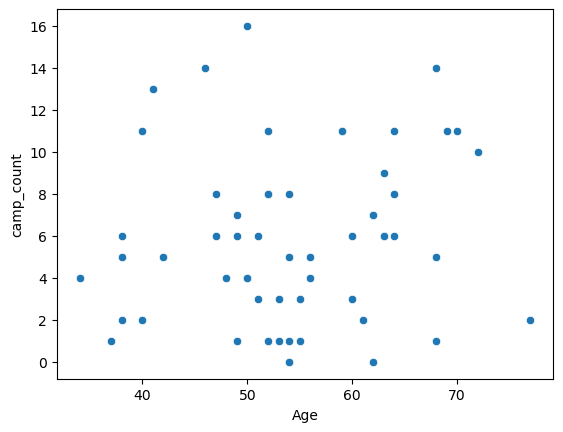

In [72]:
ax3 = sns.scatterplot(x=new_df['Age'],y=new_df['camp_count'])
new_df[['Age','camp_count']].corr() 
# positive but weak relation between age and campaign response

#### o	Which Country has the greatest number of customers who accepted the last campaign?

In [73]:
new_df.groupby(['Country'])['Response'].sum().sort_values(ascending=False)

Country
SP     176
SA      52
CA      38
AUS     23
GER     17
IND     13
US      13
ME       2
Name: Response, dtype: int64

#### o	Do you see any pattern in the no. of children at home and total spend?

,total_children,total_spent
total_children,1.000000,-0.498898
total_spent,-0.498898,1.000000


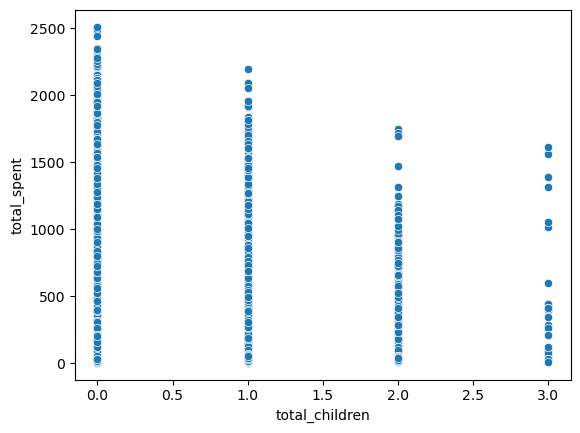

In [74]:
ax4 = sns.scatterplot(x=new_df['total_children'],y=new_df['total_spent'])
new_df[['total_children','total_spent']].corr() 

<Axes: xlabel='total_children', ylabel='total_spent'>

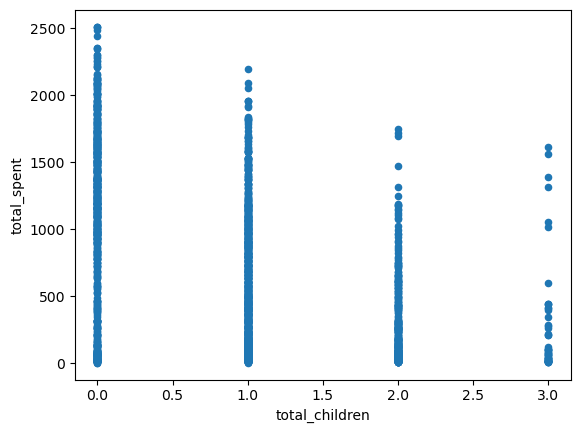

In [80]:
new_df.plot(x='total_children',y='total_spent',kind='scatter',legend=True)

#### o	Education background of the customers who complained in the last 2 years.

In [75]:
x = new_df.groupby(['Education'])['Complain'].sum().reset_index()

In [76]:
x

,Education,Complain
0,2n Cycle,4
1,Basic,0
2,Graduation,14
3,Master,2
4,PhD,1


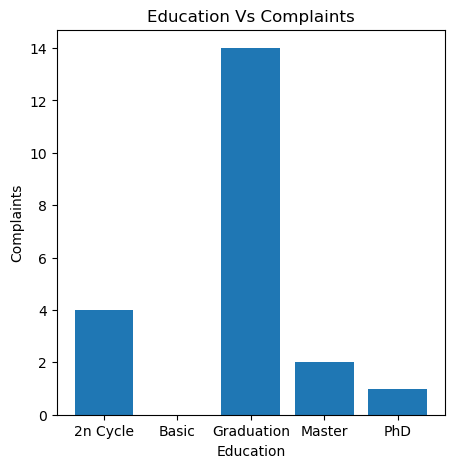

In [77]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))

plt.bar(x['Education'], x['Complain'])
plt.xlabel('Education')
plt.ylabel('Complaints')
# plt.legend(['closed','open'])
plt.title('Education Vs Complaints')

plt.show()

<Axes: xlabel='Education'>

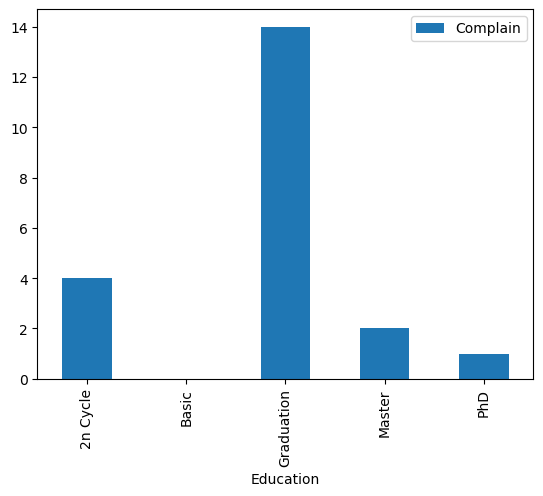

In [79]:
x.plot(x='Education',y='Complain',kind='bar',legend=True)